iタスク,anyモデルについて可視化する関数を用意する  
データのpathはこの階層のconfigに用意しておく
モデルの設定を上手くやるとepochの増加に対する精度の比較が楽にやれる  
これを全タスクについてやる上位関数を作る  
所定のパス(この階層のconfig)に画像を保存する関数を別に用意しておく  

In [1]:
import os, sys
import json
PATH_CUR = os.path.dirname(os.path.realpath("__file__"))
sys.path.append(PATH_CUR)
with __import__('importnb').Notebook(): 
    from score_store import ScoreStoringLoader
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np



In [25]:
def vis_oneimg(data_dic,vis_model_param,xy_width,png_path,save):
    fig1 = plt.figure()

    xlabel,ylabel="iter","bitError"
    ax1 = fig1.add_subplot(111)
    ax1.set_xlabel(xlabel,fontsize=14)
    ax1.set_ylabel(ylabel,fontsize=14)

    if xy_width[0] !=False:
        ax1.set_xlim(xy_width[0][0],xy_width[0][1] )
    if xy_width[1] !=False:
        ax1.set_ylim(xy_width[1][0],xy_width[1][1] )

    batch_size=0
    handles=[]
    labels=[]
    for modeldir,data_bs in data_dic.items():
        p_s=[]
        for k,v in data_bs.items():
            if k=="batch_size":batch_size=v
            else:
                x=v[xlabel]
                y=v[ylabel]
                ##ax1.plot(x,y,color=vis_model_param[modeldir]["color"],marker=".",label=vis_model_param[modeldir]["modellabel"],markersize=4) #ls linestyle
                p,=ax1.plot(x,y,color=vis_model_param[modeldir]["color"],marker=".",markersize=4) #ls linestyle
                p_s.append(p)
        handles.append(tuple(p_s))
        labels.append(vis_model_param[modeldir]["modellabel"])

    ##handles, labels = ax1.get_legend_handles_labels()
    ##fig1.legend(handles, labels,title="models",bbox_to_anchor=(0, -0.01), loc='upper left', borderaxespad=0,fontsize=10)
    fig1.legend(handles, labels,title="models",bbox_to_anchor=(0, -0.01), loc='upper left', borderaxespad=0,fontsize=10)

    #plt.legend(h1+h2, l1+l2)
    fig1.suptitle('batch_size = '+str(batch_size))

    if save:
        fig1.savefig(png_path,bbox_inches="tight")


In [37]:
def vis_associative(filename):
    vis_model_param={"ntm":{"modellabel":"basicNTM","color":"blue"},
                    "rrnn":{"modellabel":"memory + R-RNN","color":"green"},
                    "sortrrnn":{"modellabel":"sort + R-RNN","color":"orange"}
                    }
    modeldir_list=vis_model_param.keys()
    savescore_dir ="/work/handmade_utils/sotsuron_scores/ntm_vlgiitr/associative"
    fileid="v1228"
    runid_list=range(1,6)

    ssl=ScoreStoringLoader(savescore_dir,modeldir_list,fileid,runid_list)
    data_dic =ssl.get_data_dic()
    xy_width=([0,12000],False)
    savedir="saved_imgs/ntm_vlgiitr/associative"
    png_path=os.path.join(savedir,filename)
    vis_oneimg(data_dic,vis_model_param,xy_width,png_path,save=True)

def vis_priority(filename):
    vis_model_param={"ntm":{"modellabel":"basicNTM","color":"blue"},
                    #"rrnn":{"modellabel":"memory + R-RNN","color":"green"},
                    "sortrrnn":{"modellabel":"sort + R-RNN","color":"orange"}
                    }
    modeldir_list=vis_model_param.keys()
    savescore_dir ="/work/handmade_utils/sotsuron_scores/ntm_vlgiitr/priority"
    fileid="v1228"
    runid_list=range(1,6)

    ssl=ScoreStoringLoader(savescore_dir,modeldir_list,fileid,runid_list)
    data_dic =ssl.get_data_dic()

    xy_width=(False,False)
    savedir="saved_imgs/ntm_vlgiitr/priority"
    png_path=os.path.join(savedir,filename)
    vis_oneimg(data_dic,vis_model_param,xy_width,png_path,save=False)

run_ids: range(1, 6)


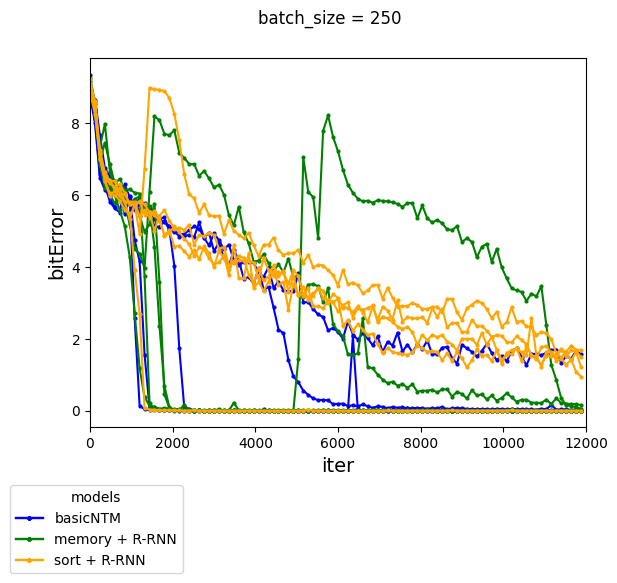

In [38]:
vis_associative("v1228_0-12000.png")
#vis_priority()
#vis_nth()
#vis_babi()

過去のコード。ベースラインやbabiを可視化するときは参考になるか

In [ ]:
def get_multiSSasDF(readSS_config,fileid_str_list):
    dir_data_dic ={}
    for dirname in readSS_config["read_directories"]:
        ssl=ScoreStoringLoader(dirname,readSS_config["filename_common"],fileid_str_list,vals=["step","bitError"])
        dir_data_dic[dirname] =ssl.get_data_dic()
    df=pd.DataFrame(dir_data_dic).reindex(index=fileid_str_list)
    return df

In [ ]:
with open("./config_sotsuron.json", "r") as fp:
    config = json.load(fp)
readSS_config=config["read_ScoreStoring"]
vis_config =config["visualization"]
baseline_config =vis_config["baselines"]

#fileid_str_list =[str(i) for i in range(1,21)]
#fileid_str_list.append("mean")
#fileid_str_list =["","2","_Adam_clip50"]
fileid_str_list=readSS_config["fileid_list"]

accSequence_df =get_multiSSasDF(readSS_config,fileid_str_list)
accSequence_df

read_filename_ids: ['adam50', 'adam50c20', 'rrnn', 'rrnn_sort']


,ntm_vlgiitr
adam50,"{'step': [0.0, 200.0, 400.0, 600.0, 800.0, 100..."
adam50c20,"{'step': [0.0, 200.0, 400.0, 600.0, 800.0, 100..."
rrnn,"{'step': [0.0, 200.0, 400.0, 600.0, 800.0, 100..."
rrnn_sort,"{'step': [0.0, 200.0, 400.0, 600.0, 800.0, 100..."


In [ ]:
class BaselinesLoader(): 
    #data_config["savescore_dir"],data_config["filename_common"]
    def __init__(self,filename_list,baseline_dir="/work/handmade_utils/sotsuron_scores/baseline_scores",desc_lines=1,sep=":",vals=["taskid","accuracy"]):
        self.desc_lines =desc_lines
        self.sep=sep
        print("read_baseline_files:",filename_list)

        self.filename_list =filename_list
        self.data_dic={} 

        self.filepath_dic ={}
        for filename in filename_list:
            self.filepath_dic[filename] =os.path.join(baseline_dir,filename+".txt")

        for filename,path in self.filepath_dic.items():
            with open(path, "r" , encoding= "utf-8" ) as f:
                lines=f.read().splitlines()[self.desc_lines:]
                listed_data = [line.split(self.sep) for line in lines] #[["mean" , "0.83"], ...]
                self.data_dic[filename] ={line[0]:float(line[1]) for line in listed_data} #{"mean" : 0.83 , "1": ...}

    def get_data_dic(self): 
        return self.data_dic

In [14]:
baselinesloader =BaselinesLoader(baseline_config["filenames"])
bases =baselinesloader.get_data_dic()
print(bases)

read_baseline_files: ['dnc_grave', 'lstm_grave']
{'dnc_grave': {'1': 0.91, '2': 0.608, '3': 0.604, '4': 0.996, '5': 0.985, '6': 0.9309999999999999, '7': 0.902, '8': 0.945, '9': 0.9229999999999999, '10': 0.904, '11': 0.9670000000000001, '12': 0.95, '13': 0.9690000000000001, '14': 0.89, '15': 0.728, '16': 0.46399999999999997, '17': 0.6759999999999999, '18': 0.958, '19': 0.35400000000000004, '20': 1.0, 'mean': 0.833}, 'lstm_grave': {'1': 0.716, '2': 0.44, '3': 0.487, '4': 0.992, '5': 0.968, '6': 0.848, '7': 0.836, '8': 0.823, '9': 0.846, '10': 0.713, '11': 0.878, '12': 0.946, '13': 0.928, '14': 0.441, '15': 0.53, '16': 0.467, '17': 0.652, '18': 0.95, '19': 0.091, '20': 0.987, 'mean': 0.727}}


read_baseline_files: ['dnc_grave', 'lstm_grave']


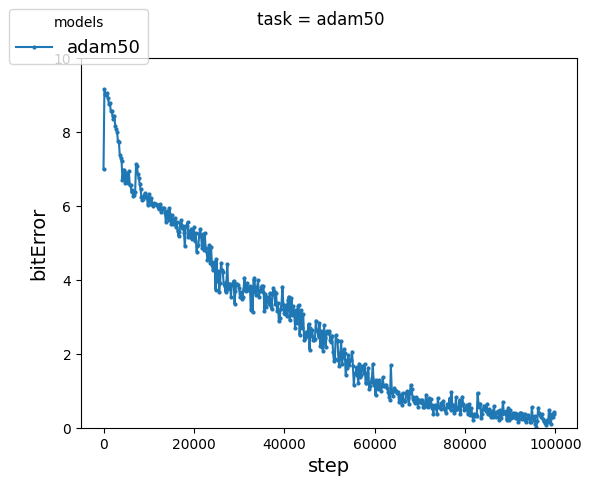

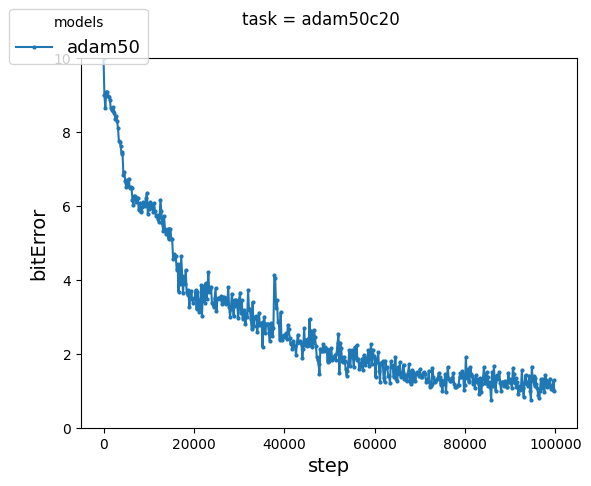

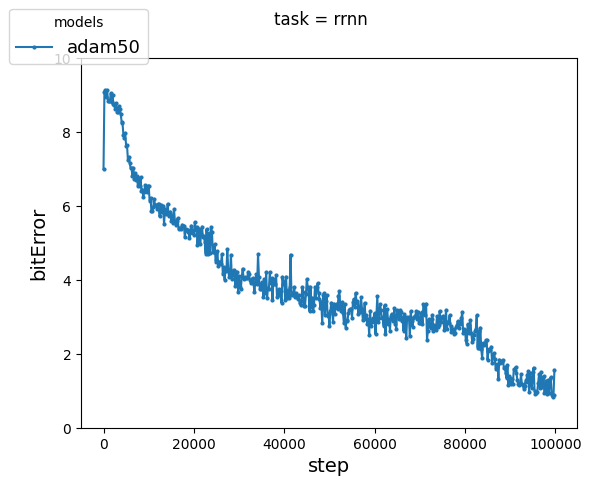

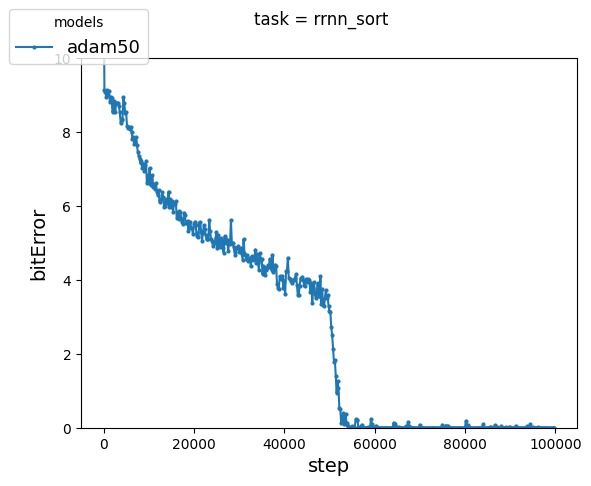

In [18]:
xlabel,ylabel="step","bitError"

baselinesloader =BaselinesLoader(baseline_config["filenames"])
bases =baselinesloader.get_data_dic()
for task,data in accSequence_df.iterrows():
    png_path=os.path.join(vis_config["savedir"],vis_config["savefile_common"]+task+".png")

    fig1 = plt.figure()

    ax1 = fig1.add_subplot(111)
    #ax1.set_xlim(left=0)
    ax1.set_ylim(0, 10)
    ax1.set_xlabel(xlabel,fontsize=14)
    ax1.set_ylabel(ylabel,fontsize=14)

    ##for ind_base,base_name in enumerate(baseline_config["filenames"]):
    ##    ax1.axhline(y=bases[base_name][task],color=baseline_config["base_colors"][ind_base]) #~label
    

    for ind,label in enumerate(readSS_config["read_directories"]):
        x=data[label][xlabel]
        y=data[label][ylabel]
        ax1.plot(x,y,marker=".",label=vis_config["model_labels"][ind],markersize=4) #ls linestyle

    handles, labels = ax1.get_legend_handles_labels()
    fig1.legend(handles, labels,title="models",fontsize=13,loc='upper left')
    #plt.legend(h1+h2, l1+l2)
    fig1.suptitle('task = '+task)
    
    fig1.savefig(png_path,bbox_inches="tight")